In [150]:
import csv
import numpy as np

In [151]:
#load feature variables and their names
# X_filename = '/content/drive/MyDrive/23ws/HW3/hitters.x.csv'
# y_filename = '/content/drive/MyDrive/23ws/HW3/hitters.y.csv'

X_filename = 'hitters.x.csv'
y_filename = 'hitters.y.csv'

X=np.loadtxt(X_filename, delimiter=',',skiprows=1)
with open(X_filename, 'r') as f:
  X_colnames = next(csv.reader(f))
#load salaries
y=np.loadtxt(y_filename, delimiter=',', skiprows=1)

## 3.1
1.   If the features's value have huge difference, the larger features may have significant effect on the output. However, the smaller values may be ignored in this situation.
2.   And when we compute the gradient descent, it may oscillate and takes long time to convergence.

## 3.2
(see above)



In [152]:
# features scaling
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_normalized =  (X-X_mean)/X_std

I = np.ones((X_normalized.shape[0],1))
X_aug = np.hstack((I,X_normalized))

In [153]:
# the close form of ridge regression without the bias term
def ridge(X,y,lambda1):
  I_tilde = np.eye((X.shape[1]))
  I_tilde[0,0] = 0
  a=(X.T)@X+ np.dot(lambda1,I_tilde)
  a_inv =np.linalg.inv(a)
  b = X.T@y
  return a_inv@b

## 3.3 plotting the ℓ2 norm of the regression coefficients versus λ on a log-log plot.

In [154]:
lambda1 = np.logspace(-3,7,100)
n = len(lambda1) # 100
theta_hat = np.zeros((X_aug.shape[1],n))
print(theta_hat.shape)
for i,lam in enumerate(lambda1):
  # print(ridge(X_aug,y,lam).reshape((1,-1)).shape)
  theta_hat[:,i] = ridge(X_aug,y,lam)

(20, 100)


Text(0.5, 1.0, 'The ℓ2 norm of the regression coefficients versus λ')

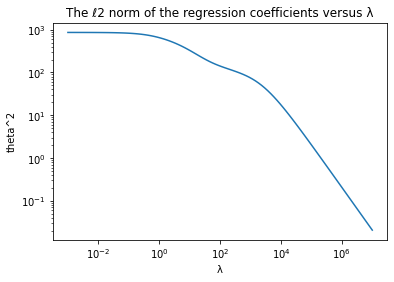

In [155]:
import matplotlib.pyplot as plt
theta_l2_norm = np.sqrt((theta_hat[1:,:]**2).sum(axis=0))
plt.loglog(lambda1,theta_l2_norm)
# plt.semilogx(lambda1,theta_l2_norm)
plt.xlabel('λ')
plt.ylabel('theta^2')
plt.title('The ℓ2 norm of the regression coefficients versus λ')

## 3.4  a very small (or large) value of λ

(20,)


Text(0, 0.5, 'theta')

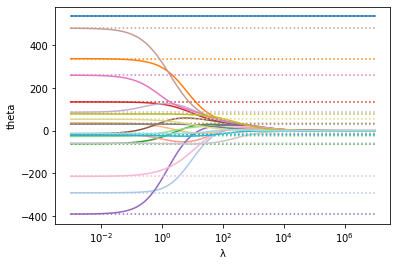

In [156]:
theta_0 = ridge(X_aug, y, 0) #linear
print(theta_0.shape)
color_map = plt.cm.tab20

for j, theta in enumerate(theta_0):
  line_color = color_map(j)
  plt.semilogx(lambda1,np.ones_like(lambda1)*theta,linestyle='dotted',color=line_color)
  plt.semilogx(lambda1,theta_hat[j,:],color=line_color)

plt.xlabel('λ')
plt.ylabel('theta')

## 3.5 cross-validation
Perform 5-fold cross-validation to determine the best value of λ. You should implement this
cross-validation procedure yourself. Produce a plot of the cross-validation error curve as a
function of λ.


In [157]:
k=5 # folds
n = 260 # num of total examples
batch_size = n//k # 20
idx = list(np.arange(n))
np.random.shuffle(idx)

def iter(X,y,batch_size):
  for i in range(0,n,batch_size):
    feature_idx = idx[i:i+batch_size]
    yield X[feature_idx],y[feature_idx]

Text(0, 0.5, 'MSE')

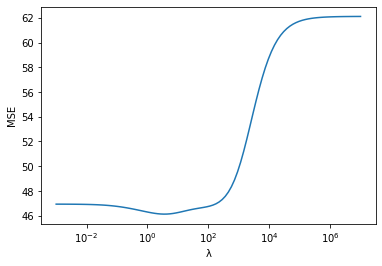

In [158]:
val_n = 0
mse = 0
mse_arr = np.zeros(100)

for i,lam in enumerate(lambda1):
  mse =0
  for j in range(k):
    train_X = np.zeros([batch_size,X_aug.shape[1]])
    train_y = np.zeros([batch_size,1])
    val_n = 0
    for features, labels in iter(X_aug,y,batch_size):
      if val_n == j:
        val_X = features
        val_y = labels
      else:
        train_X = np.vstack((train_X,features.reshape([batch_size,X_aug.shape[1]])))
        train_y = np.vstack((train_y,labels.reshape((batch_size,1))))
      val_n +=1

    w_hat = ridge(train_X[batch_size:,:], train_y[batch_size:,:],lam)
    mse += np.sqrt((((val_y.reshape((batch_size,1))-val_X@w_hat)**2).mean())/batch_size)

  mse_arr[i] = mse/5

plt.semilogx(lambda1,mse_arr)
plt.xlabel('λ')
plt.ylabel('MSE')

## 3.5 best value of λ



In [159]:
lam_star_idx = np.argmin(mse_arr)
lam_star = lambda1[lam_star_idx]
theta_star =ridge(X_aug,y,lam_star)
print('Best value of lambda: %g' % lam_star)

Best value of lambda: 3.43047


## 3.6 the coefficient estimates at the best value of λ
As the sorted theta list below, larger value means the importance that the coach should focuse on.

In [160]:
X_colnames.insert(0,'Bias')
theta_dic = list(zip(X_colnames,theta_star))
theta_dic = dict(sorted(theta_dic,key = lambda x: x[1],reverse=True))
theta_dic

{'Bias': 535.9258441064638,
 'Hits': 232.24767962897022,
 'CRuns': 201.46448602906094,
 'CHits': 120.70176629624166,
 'CRBI': 115.49807650422144,
 'Walks': 107.08567473883488,
 'PutOuts': 77.60812636861705,
 'CHmRun': 57.87869589951197,
 'Assists': 39.28028710973353,
 'LeagueN': 30.270234141529954,
 'RBI': 4.763026203699837,
 'HmRun': 1.9203613843230656,
 'Runs': -0.5792979882678537,
 'NewLeagueN': -13.603235952483999,
 'Errors': -25.113365071570357,
 'Years': -51.3809137860535,
 'DivisionW': -61.72203805297099,
 'CAtBat': -96.0925227744392,
 'CWalks': -146.3578150190708,
 'AtBat': -216.7135697036406}